# <center><b><h1>NeuralNetwork (Second Run - Ratio 1)</h1></b></center>

In [1]:
import matplotlib
import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np
from sklearn import datasets
from sklearn.feature_selection import SelectFromModel
from sklearn.metrics import accuracy_score, r2_score, recall_score, auc, roc_auc_score, roc_curve
import pandas as pd
from sklearn.externals import joblib
from scipy.stats import spearmanr, pearsonr
from sklearn.metrics import classification_report,confusion_matrix, accuracy_score, precision_score
import itertools

from sklearn.neural_network import MLPClassifier

## 1. Prepare the data

In [2]:
df_X_train = pd.read_csv("../../../Data/women_menopause/ratio1/X_train.csv", index_col=0)
df_X_train.shape

(5992, 14)

In [3]:
df_y_train = pd.read_csv("../../../Data/women_menopause/ratio1/y_train.csv", index_col=0)
df_y_train.shape

(5992, 1)

In [4]:
df_X_val = pd.read_csv("../../../Data/women_menopause/ratio1/X_val.csv", index_col=0)
df_X_val.shape

(30777, 14)

In [5]:
df_y_val = pd.read_csv("../../../Data/women_menopause/ratio1/y_val.csv", index_col=0)
df_y_val.shape

(30777, 1)

## 2. Finding the best number of layers (between 1 and 2) and the best number of neurons

### 2.1 AUC based

In [6]:
best_score_sl = actual_score = 0.5
best_i_sl = 0
for i in range(1,30,1):
    mlp = MLPClassifier(hidden_layer_sizes=(i,), max_iter=200000,verbose=False)
    mlp.fit(df_X_train,df_y_train['Class'].values)
    predictions = mlp.predict(df_X_val.values)
    fpr, tpr, thresholds = roc_curve(df_y_val['Class'].values, predictions, pos_label=1)
    actual_score = auc(fpr, tpr)
    if actual_score > best_score_sl:
        best_score_sl = actual_score
        best_i_sl = i
    print("I: ", i, "Best_I: ",best_i_sl,"Best_Score: ", best_score_sl,"Actual_Score: ", actual_score)
print("Best_I: ",best_i_sl,"Best_Score: ", best_score_sl)

I:  1 Best_I:  1 Best_Score:  0.75459209222967 Actual_Score:  0.75459209222967
I:  2 Best_I:  2 Best_Score:  0.7773517164321503 Actual_Score:  0.7773517164321503
I:  3 Best_I:  2 Best_Score:  0.7773517164321503 Actual_Score:  0.7658577853126813
I:  4 Best_I:  2 Best_Score:  0.7773517164321503 Actual_Score:  0.770005214384045
I:  5 Best_I:  5 Best_Score:  0.7776126444046174 Actual_Score:  0.7776126444046174
I:  6 Best_I:  6 Best_Score:  0.7878021270344484 Actual_Score:  0.7878021270344484
I:  7 Best_I:  6 Best_Score:  0.7878021270344484 Actual_Score:  0.7848541002400441
I:  8 Best_I:  8 Best_Score:  0.7916639236580216 Actual_Score:  0.7916639236580216
I:  9 Best_I:  9 Best_Score:  0.7929987308162791 Actual_Score:  0.7929987308162791
I:  10 Best_I:  10 Best_Score:  0.8027099730783851 Actual_Score:  0.8027099730783851
I:  11 Best_I:  10 Best_Score:  0.8027099730783851 Actual_Score:  0.7959536470277454
I:  12 Best_I:  10 Best_Score:  0.8027099730783851 Actual_Score:  0.7967840827464919
I: 

In [7]:
best_score_twol = actual_score = 0.5
best_i_twol = best_j_twol = 0
for i in range(1,30,1):
    for j in range(1,30,1):
        mlp = MLPClassifier(hidden_layer_sizes=(i,j,), max_iter=200000,verbose=False)
        mlp.fit(df_X_train,df_y_train['Class'].values)
        predictions = mlp.predict(df_X_val.values)
        fpr, tpr, thresholds = roc_curve(df_y_val['Class'].values, predictions, pos_label=1)
        actual_score = auc(fpr, tpr)
        if actual_score > best_score_twol:
            best_score_twol = actual_score
            best_i_twol = i
            best_j_twol = j
        print("I,J: ", i,"-",j)
    print("Best_I: ", best_i_twol,"Best_J: ", best_j_twol,"Best_Score: ", best_score_twol,"Actual_Score: ", actual_score)
print("Best_I: ",best_i_twol,"Best_I: ",best_j_twol,"Best_Score: ", best_score_twol)

I,J:  1 - 1
I,J:  1 - 2
I,J:  1 - 3
I,J:  1 - 4
I,J:  1 - 5
I,J:  1 - 6
I,J:  1 - 7
I,J:  1 - 8
I,J:  1 - 9
I,J:  1 - 10
I,J:  1 - 11
I,J:  1 - 12
I,J:  1 - 13
I,J:  1 - 14
I,J:  1 - 15
I,J:  1 - 16
I,J:  1 - 17
I,J:  1 - 18
I,J:  1 - 19
I,J:  1 - 20
I,J:  1 - 21
I,J:  1 - 22
I,J:  1 - 23
I,J:  1 - 24
I,J:  1 - 25
I,J:  1 - 26
I,J:  1 - 27
I,J:  1 - 28
I,J:  1 - 29
Best_I:  1 Best_J:  21 Best_Score:  0.7677400575621235 Actual_Score:  0.7658807326387038
I,J:  2 - 1
I,J:  2 - 2
I,J:  2 - 3
I,J:  2 - 4
I,J:  2 - 5
I,J:  2 - 6
I,J:  2 - 7
I,J:  2 - 8
I,J:  2 - 9
I,J:  2 - 10
I,J:  2 - 11
I,J:  2 - 12
I,J:  2 - 13
I,J:  2 - 14
I,J:  2 - 15
I,J:  2 - 16
I,J:  2 - 17
I,J:  2 - 18
I,J:  2 - 19
I,J:  2 - 20
I,J:  2 - 21
I,J:  2 - 22
I,J:  2 - 23
I,J:  2 - 24
I,J:  2 - 25
I,J:  2 - 26
I,J:  2 - 27
I,J:  2 - 28
I,J:  2 - 29
Best_I:  2 Best_J:  1 Best_Score:  0.7826124126696798 Actual_Score:  0.7825541657799732
I,J:  3 - 1
I,J:  3 - 2
I,J:  3 - 3
I,J:  3 - 4
I,J:  3 - 5
I,J:  3 - 6
I,J:  3 - 7
I,J

I,J:  18 - 16
I,J:  18 - 17
I,J:  18 - 18
I,J:  18 - 19
I,J:  18 - 20
I,J:  18 - 21
I,J:  18 - 22
I,J:  18 - 23
I,J:  18 - 24
I,J:  18 - 25
I,J:  18 - 26
I,J:  18 - 27
I,J:  18 - 28
I,J:  18 - 29
Best_I:  15 Best_J:  7 Best_Score:  0.817074964373363 Actual_Score:  0.8040583676980705
I,J:  19 - 1
I,J:  19 - 2
I,J:  19 - 3
I,J:  19 - 4
I,J:  19 - 5
I,J:  19 - 6
I,J:  19 - 7
I,J:  19 - 8
I,J:  19 - 9
I,J:  19 - 10
I,J:  19 - 11
I,J:  19 - 12
I,J:  19 - 13
I,J:  19 - 14
I,J:  19 - 15
I,J:  19 - 16
I,J:  19 - 17
I,J:  19 - 18
I,J:  19 - 19
I,J:  19 - 20
I,J:  19 - 21
I,J:  19 - 22
I,J:  19 - 23
I,J:  19 - 24
I,J:  19 - 25
I,J:  19 - 26
I,J:  19 - 27
I,J:  19 - 28
I,J:  19 - 29
Best_I:  15 Best_J:  7 Best_Score:  0.817074964373363 Actual_Score:  0.798211914432605
I,J:  20 - 1
I,J:  20 - 2
I,J:  20 - 3
I,J:  20 - 4
I,J:  20 - 5
I,J:  20 - 6
I,J:  20 - 7
I,J:  20 - 8
I,J:  20 - 9
I,J:  20 - 10
I,J:  20 - 11
I,J:  20 - 12
I,J:  20 - 13
I,J:  20 - 14
I,J:  20 - 15
I,J:  20 - 16
I,J:  20 - 17
I,J

## 3 Find the best random state for both single layer and two layers

In [8]:
best_score_sl = actual_score = 0
best_random_state_sl = 0
for i in range(1,100,1):
    mlp = MLPClassifier(hidden_layer_sizes=(best_i_sl,), max_iter=200000,verbose=False, random_state=i)
    mlp.fit(df_X_train,df_y_train['Class'].values)
    predictions = mlp.predict(df_X_val.values)
    fpr, tpr, thresholds = roc_curve(df_y_val['Class'].values, predictions, pos_label=1)
    actual_score = auc(fpr, tpr)
    if actual_score > best_score_sl:
        best_score_sl = actual_score
        best_random_state_sl = i
    print("I: ", i, "Best_Random_State: ",best_random_state_sl,"Best_Score: ", best_score_sl,"Actual_Score: ", actual_score)
print("Best_Random_State: ",best_random_state_sl,"Best_Score: ", best_score_sl)

I:  1 Best_Random_State:  1 Best_Score:  0.805474038519218 Actual_Score:  0.805474038519218
I:  2 Best_Random_State:  2 Best_Score:  0.808156909744322 Actual_Score:  0.808156909744322
I:  3 Best_Random_State:  2 Best_Score:  0.808156909744322 Actual_Score:  0.8043323612064303
I:  4 Best_Random_State:  4 Best_Score:  0.8112210997653005 Actual_Score:  0.8112210997653005
I:  5 Best_Random_State:  4 Best_Score:  0.8112210997653005 Actual_Score:  0.8014228177214736
I:  6 Best_Random_State:  4 Best_Score:  0.8112210997653005 Actual_Score:  0.8063902787959193
I:  7 Best_Random_State:  4 Best_Score:  0.8112210997653005 Actual_Score:  0.8103625844527709
I:  8 Best_Random_State:  4 Best_Score:  0.8112210997653005 Actual_Score:  0.8049107068917692
I:  9 Best_Random_State:  4 Best_Score:  0.8112210997653005 Actual_Score:  0.8041286362725999
I:  10 Best_Random_State:  4 Best_Score:  0.8112210997653005 Actual_Score:  0.8023620053241972
I:  11 Best_Random_State:  4 Best_Score:  0.8112210997653005 Act

I:  87 Best_Random_State:  56 Best_Score:  0.8137510816036837 Actual_Score:  0.8037441337309618
I:  88 Best_Random_State:  56 Best_Score:  0.8137510816036837 Actual_Score:  0.8101837553669603
I:  89 Best_Random_State:  56 Best_Score:  0.8137510816036837 Actual_Score:  0.8065338083180457
I:  90 Best_Random_State:  56 Best_Score:  0.8137510816036837 Actual_Score:  0.8087370125789621
I:  91 Best_Random_State:  56 Best_Score:  0.8137510816036837 Actual_Score:  0.8062511682433224
I:  92 Best_Random_State:  56 Best_Score:  0.8137510816036837 Actual_Score:  0.8018706994205792
I:  93 Best_Random_State:  56 Best_Score:  0.8137510816036837 Actual_Score:  0.8011147598731958
I:  94 Best_Random_State:  56 Best_Score:  0.8137510816036837 Actual_Score:  0.8083737002140452
I:  95 Best_Random_State:  56 Best_Score:  0.8137510816036837 Actual_Score:  0.8075736231639182
I:  96 Best_Random_State:  56 Best_Score:  0.8137510816036837 Actual_Score:  0.8054646786546236
I:  97 Best_Random_State:  56 Best_Score

In [9]:
best_score_twol = actual_score = 0
best_random_state_twol = 0
for i in range(1,100,1):
    mlp = MLPClassifier(hidden_layer_sizes=(best_i_twol,best_j_twol), max_iter=200000,verbose=False, random_state=i)
    mlp.fit(df_X_train,df_y_train['Class'].values)
    predictions = mlp.predict(df_X_val.values)
    fpr, tpr, thresholds = roc_curve(df_y_val['Class'].values, predictions, pos_label=1)
    actual_score = auc(fpr, tpr)
    if actual_score > best_score_twol:
        best_score_twol = actual_score
        best_random_state_twol = i
    print("I: ", i, "Best_Random_State: ",best_random_state_twol,"Best_Score: ", best_score_twol,"Actual_Score: ", actual_score)
print("Best_Random_State: ",best_random_state_twol,"Best_Score: ", best_score_twol)

I:  1 Best_Random_State:  1 Best_Score:  0.8052764897042186 Actual_Score:  0.8052764897042186
I:  2 Best_Random_State:  1 Best_Score:  0.8052764897042186 Actual_Score:  0.803410988661968
I:  3 Best_Random_State:  1 Best_Score:  0.8052764897042186 Actual_Score:  0.8038440476758795
I:  4 Best_Random_State:  4 Best_Score:  0.8092364431234085 Actual_Score:  0.8092364431234085
I:  5 Best_Random_State:  4 Best_Score:  0.8092364431234085 Actual_Score:  0.8046330077121109
I:  6 Best_Random_State:  6 Best_Score:  0.8172382574757483 Actual_Score:  0.8172382574757483
I:  7 Best_Random_State:  6 Best_Score:  0.8172382574757483 Actual_Score:  0.8030309050898594
I:  8 Best_Random_State:  6 Best_Score:  0.8172382574757483 Actual_Score:  0.8014233396470085
I:  9 Best_Random_State:  6 Best_Score:  0.8172382574757483 Actual_Score:  0.8124000251637699
I:  10 Best_Random_State:  6 Best_Score:  0.8172382574757483 Actual_Score:  0.8023718871143267
I:  11 Best_Random_State:  6 Best_Score:  0.8172382574757483

I:  88 Best_Random_State:  6 Best_Score:  0.8172382574757483 Actual_Score:  0.8052298817539427
I:  89 Best_Random_State:  6 Best_Score:  0.8172382574757483 Actual_Score:  0.8095711539690071
I:  90 Best_Random_State:  6 Best_Score:  0.8172382574757483 Actual_Score:  0.7980666277611774
I:  91 Best_Random_State:  6 Best_Score:  0.8172382574757483 Actual_Score:  0.8135392320290252
I:  92 Best_Random_State:  6 Best_Score:  0.8172382574757483 Actual_Score:  0.8031197020208818
I:  93 Best_Random_State:  6 Best_Score:  0.8172382574757483 Actual_Score:  0.8094110446123854
I:  94 Best_Random_State:  6 Best_Score:  0.8172382574757483 Actual_Score:  0.8094991282451763
I:  95 Best_Random_State:  6 Best_Score:  0.8172382574757483 Actual_Score:  0.8040004513612027
I:  96 Best_Random_State:  6 Best_Score:  0.8172382574757483 Actual_Score:  0.8100434095905974
I:  97 Best_Random_State:  6 Best_Score:  0.8172382574757483 Actual_Score:  0.8130429852303425
I:  98 Best_Random_State:  6 Best_Score:  0.817238

## 4. Compute metrics on the best architecture

In [10]:
if best_score_sl > best_score_twol:
    best_architecture = "Two Layers"
    best_neurons = [best_i_sl]
    mlp = MLPClassifier(hidden_layer_sizes=(best_i_sl,), max_iter=200000,verbose=False, random_state=best_random_state_sl)
    mlp.fit(df_X_train,df_y_train['Class'].values)
else:
    best_architecture = "Two Layers"
    best_neurons = [best_i_twol, best_j_twol]
    mlp = MLPClassifier(hidden_layer_sizes=(best_i_twol,best_j_twol), max_iter=200000,verbose=False, random_state=best_random_state_twol)
    mlp.fit(df_X_train,df_y_train['Class'].values)

predictions = mlp.predict(df_X_val.values)
print("The best architecture is : ", best_architecture)
layer = 0
for neuron in best_neurons:
    layer += 1
    print("For the layer ", layer, " the best number of neurons is : ", neuron)

The best architecture is :  Two Layers
For the layer  1  the best number of neurons is :  25
For the layer  2  the best number of neurons is :  13


### 4.1 Confusion Matrix and Classification Report

In [11]:
conf_mat = confusion_matrix(df_y_val['Class'].values,predictions)
tn, fp, fn, tp = conf_mat.ravel()
print(conf_mat)

[[22967  6846]
 [  131   833]]


In [12]:
print(classification_report(df_y_val['Class'].values,predictions,target_names=['Non-Fracture','Fracture']))

              precision    recall  f1-score   support

Non-Fracture       0.99      0.77      0.87     29813
    Fracture       0.11      0.86      0.19       964

   micro avg       0.77      0.77      0.77     30777
   macro avg       0.55      0.82      0.53     30777
weighted avg       0.97      0.77      0.85     30777



### 4.2 Accuracy

In [13]:
accuracy = (tp + tn) / float(tp+tn+fp+fn)
print("Accuracy : ",accuracy)

Accuracy :  0.7733047405530104


### 4.3 Recall (or Sensitivity)

In [14]:
recall = tp/(tp+fn)
print("Recall : ", recall)

Recall :  0.8641078838174274


### 4.4 Error

In [15]:
classification_error = (fp + fn) / float(tp+tn+fp+fn)
print("Error : ",classification_error)

Error :  0.22669525944698962


### 4.5 Specificity

In [16]:
specificity = tn / (tn+fp)

print(specificity)

0.7703686311340691


### 4.6 False Positive Rate: When the actual value is negative, how often is the prediction incorrect?

In [17]:
false_positive_rate = fp / float(tn+fp)

print(false_positive_rate)
print(1 - specificity)

0.22963136886593097
0.22963136886593094


### 4.7 Precision: When a positive value is predicted, how often is the prediction correct?

In [18]:
precision = tp / float(tp+fp)

print(precision)

0.10847766636280766


## 5 Metrics visualization

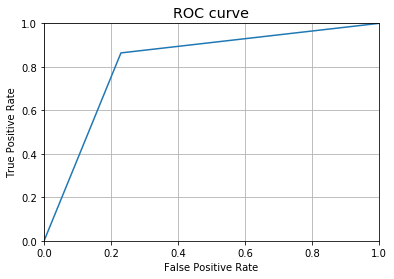

In [19]:
fpr, tpr, thresholds = roc_curve(df_y_val, predictions)

plt.plot(fpr, tpr)
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.0])
plt.rcParams['font.size'] = 12
plt.title('ROC curve')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.grid(True)

## 7. Save the model

In [20]:
joblib.dump(mlp, 'NeuralNetwork - Women_Menopause - Second Run - Ratio 1.pkl') 

['NeuralNetwork - Women_Menopause - Second Run - Ratio 1.pkl']